**SPACESHIP TITANIC**

**PUC MVP ENGENHARIA DE SOFTARE**

GILMAR NEVES



---



**INITIAL SETTINGS AND IMPORTS**

In [61]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
import pathlib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

In [62]:
filepath = './train.csv'
df = pd.read_csv(filepath)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [63]:
print("Categorical Variables")
categorical_variables = df.select_dtypes(include=['object']).columns
for col in categorical_variables:
    print(col)

Categorical Variables
PassengerId
HomePlanet
CryoSleep
Cabin
Destination
VIP
Name


In [64]:
print("Numerical Variables")
numerical_variables = df._get_numeric_data().columns
for col in numerical_variables:
    print(col)

Numerical Variables
Age
RoomService
FoodCourt
ShoppingMall
Spa
VRDeck
Transported


In [65]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [66]:
def get_nulls(df):
    dict_nulls = {}
    for col in  df.columns:
        dict_nulls[col]=df[col].isnull().sum()

    df_nulls = pd.DataFrame(data=list(dict_nulls.values()),
                            index=list(dict_nulls.keys()),
                            columns=['#nulls'])
    return df_nulls

get_nulls(df)

,#nulls
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


In [67]:
def get_nulls_percentage(df):
    dict_nulls = {}
    for col in  df.columns:
        percentage_null_values = str(round(df[col].isnull().sum()/len(df),2))+\
        "%"
        dict_nulls[col] = percentage_null_values

    df_nulls = pd.DataFrame(data=list(dict_nulls.values()),
                            index=list(dict_nulls.keys()),
                            columns=['% nulls'])
    return df_nulls

get_nulls_percentage(df)

,% nulls
PassengerId,0.0%
HomePlanet,0.02%
CryoSleep,0.02%
Cabin,0.02%
Destination,0.02%
Age,0.02%
VIP,0.02%
RoomService,0.02%
FoodCourt,0.02%
ShoppingMall,0.02%


In [68]:
for cat_col in categorical_variables:
    if cat_col!="Name":
        df[cat_col] = df[cat_col].fillna(df[cat_col].mode()[0])

C:\Users\gilma\AppData\Local\Temp\ipykernel_2648\2756269759.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cat_col] = df[cat_col].fillna(df[cat_col].mode()[0])


In [69]:
for num_col in numerical_variables:
    df[num_col] = df[num_col].fillna(df[num_col].mean())

In [70]:
get_nulls_percentage(df)

,% nulls
PassengerId,0.0%
HomePlanet,0.0%
CryoSleep,0.0%
Cabin,0.0%
Destination,0.0%
Age,0.0%
VIP,0.0%
RoomService,0.0%
FoodCourt,0.0%
ShoppingMall,0.0%


In [71]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.339054,659.739364,1594.434978,597.417440,1124.675871,1133.259049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [72]:
df.describe(include=['O'])

,PassengerId,HomePlanet,Cabin,Destination,Name
count,8693,8693,8693,8693,8493
unique,8693,3,6560,3,8473
top,9280_02,Earth,G/734/S,TRAPPIST-1e,Anton Woody
freq,1,4803,207,6097,2


In [73]:
# Dropping the name column we don't need anymore
df.drop(['Name'], axis=1, inplace=True)

In [74]:
categorical_variables = df.select_dtypes(include=['object']).columns

In [75]:
categorical_variables

Index(['PassengerId', 'HomePlanet', 'Cabin', 'Destination'], dtype='object')

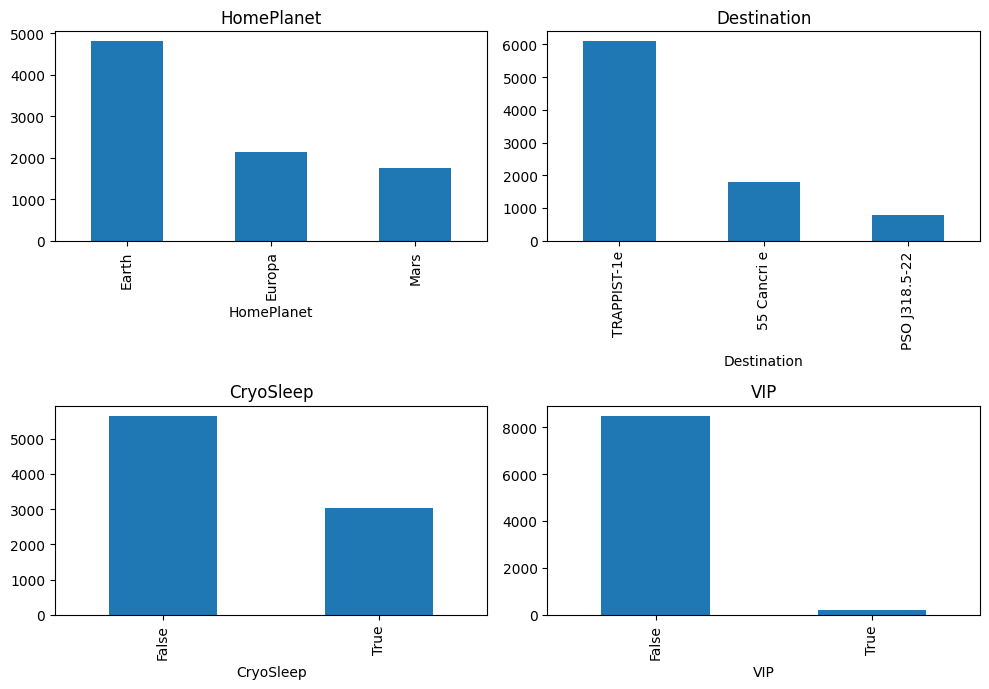

In [76]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
df['HomePlanet'].value_counts().plot(kind='bar', title='HomePlanet')
plt.subplot(2,2,2)
df['Destination'].value_counts().plot(kind='bar', title='Destination')
plt.subplot(2,2,3)
df['CryoSleep'].value_counts().plot(kind='bar', title='CryoSleep')
plt.subplot(2,2,4)
df['VIP'].value_counts().plot(kind='bar',title='VIP')
plt.tight_layout();

In [77]:
df['VIP'].value_counts()

VIP
False    8494
True      199
Name: count, dtype: int64

In [78]:
numerical_variables = list(numerical_variables)
if "train" in filepath:
    numerical_variables.remove('Transported')

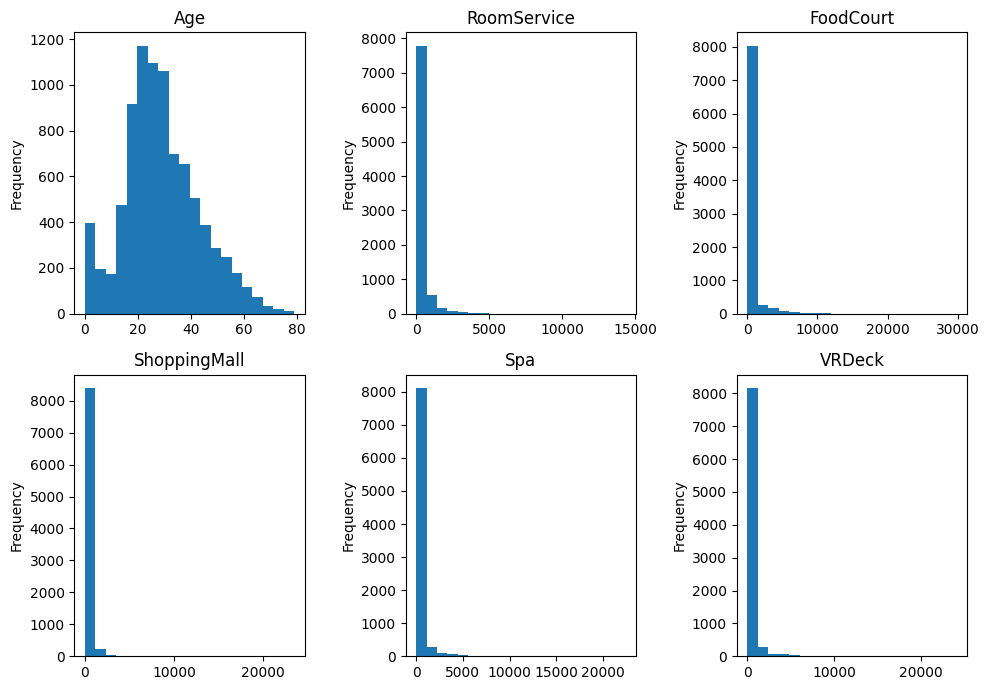

In [79]:
plt.figure(figsize=(10,7))
for i,num_col in enumerate(numerical_variables):
    plt.subplot(2,3,i+1)
    df[num_col].plot(kind='hist', bins=20)
    plt.title(num_col)
plt.tight_layout();

In [80]:
# building the deck and port features from the 'cabin' column
df['Deck'] = df['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
df['Port'] = df['Cabin'].apply(lambda s: s[-1] if pd.notnull(s) else 'M')
df["Deck"] = df["Deck"].map({'B':0, 'F':1, 'A':2, 'G':3, 'E':4, 'D':5, 'C':6, 'T':7}).astype(int)
df["Port"] = df["Port"].map({'P':0, 'S':1}).astype(int)
df.drop(['Cabin'], axis=1, inplace=True)
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0,0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,1
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,2,1
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,2,1
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,1


In [81]:
# # 1. One-hot encoding using get_dummies()
# df_encoded = pd.get_dummies(df, columns=['HomePlanet', 'Destination'])

In [82]:
###

In [83]:
df["HomePlanet"] = df["HomePlanet"].map({'Earth':1, 'Europa':2, 'Mars':3}).astype(int)

df["Destination"] = df["Destination"].map({'TRAPPIST-1e':1, 'PSO J318.5-22':2, '55 Cancri e':3}).astype(int)


In [84]:
# Summing up the spending categories
df['TotalSpend'] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
df = df.drop(['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis=1)

In [85]:
df.head(5)

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Deck,Port,TotalSpend
0,0001_01,2,False,1,39.0,False,False,0,0,0.0
1,0002_01,1,False,1,24.0,False,True,1,1,736.0
2,0003_01,2,False,1,58.0,True,False,2,1,10383.0
3,0003_02,2,False,1,33.0,False,False,2,1,5176.0
4,0004_01,1,False,1,16.0,False,True,1,1,1091.0


In [86]:
# Convert all boolean columns to 0 and 1
df['CryoSleep'] = df['CryoSleep'].astype(int)
df['VIP'] = df['VIP'].astype(int)

In [87]:
if 'train' in filepath:
    df.drop(['PassengerId'],axis=1, inplace=True)

In [88]:
### Check on the correlation

In [89]:
correlation_matrix = df.corr()
correlation_matrix

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Deck,Port,TotalSpend
HomePlanet,1.000000,0.083586,-0.034737,0.133888,0.123512,0.115461,0.014401,0.000636,0.150317
CryoSleep,0.083586,1.000000,0.096287,-0.070736,-0.078281,0.460132,0.036362,0.023858,-0.376500
Destination,-0.034737,0.096287,1.000000,0.006619,0.044707,0.108152,0.038141,0.012979,0.099205
Age,0.133888,-0.070736,0.006619,1.000000,0.091574,-0.074249,0.039150,0.011758,0.184509
VIP,0.123512,-0.078281,0.044707,0.091574,1.000000,-0.037261,0.033100,-0.008798,0.163187
Transported,0.115461,0.460132,0.108152,-0.074249,-0.037261,1.000000,0.001701,0.101397,-0.199445
Deck,0.014401,0.036362,0.038141,0.039150,0.033100,0.001701,1.000000,0.014620,0.125916
Port,0.000636,0.023858,0.012979,0.011758,-0.008798,0.101397,0.014620,1.000000,0.003390
TotalSpend,0.150317,-0.376500,0.099205,0.184509,0.163187,-0.199445,0.125916,0.003390,1.000000


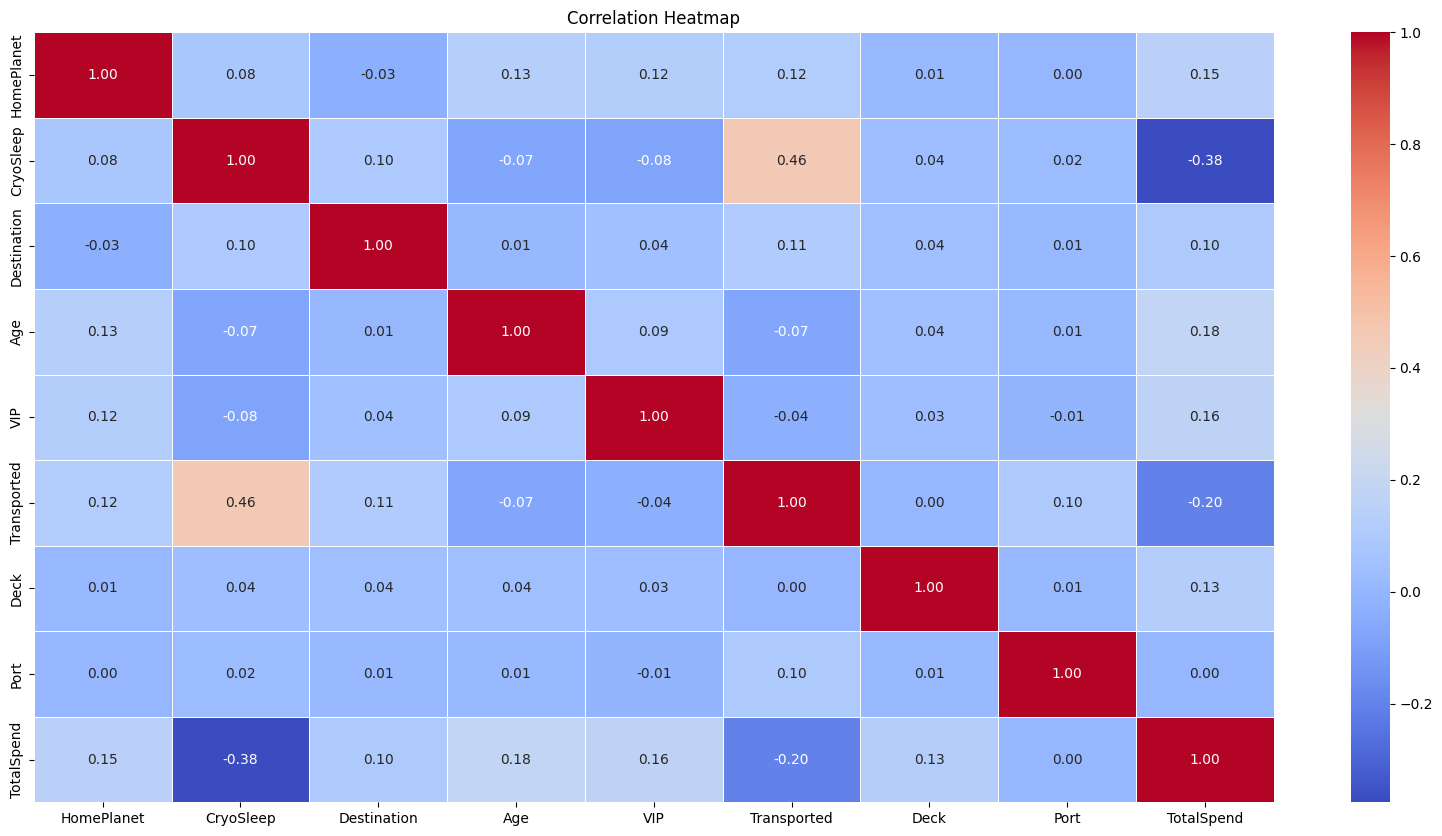

In [90]:
# Create the correlation heatmap with two decimal places in annotations
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [91]:
###

In [92]:
### SAVE TRAIN 1

filename =  pathlib.Path(filepath).stem + "_cleaned_1.csv"
file_dest_path = pathlib.Path("./") / filename
df.to_csv(file_dest_path, index=False)

In [93]:
### FIRST TRAINING

In [94]:
df_train_1 = pd.read_csv("./train_cleaned_1.csv")
# 1. Train Test Split
X = df_train_1.drop("Transported", axis=1).values
y = df_train_1["Transported"].values

In [95]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape,y_train.shape, X_test.shape, y_test.shape

((6954, 8), (6954,), (1739, 8), (1739,))

In [96]:
df_train_1.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Deck,Port,TotalSpend
0,2,0,1,39.0,0,False,0,0,0.0
1,1,0,1,24.0,0,True,1,1,736.0
2,2,0,1,58.0,1,False,2,1,10383.0
3,2,0,1,33.0,0,False,2,1,5176.0
4,1,0,1,16.0,0,True,1,1,1091.0


In [97]:
# MODELS

In [98]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_score = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_score)


KNN Accuracy: 0.7078780908568143


In [99]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree_score = accuracy_score(y_test, dtree_pred)
print("Decision Tree Accuracy:", dtree_score)


Decision Tree Accuracy: 0.684301322599195


In [100]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_score = accuracy_score(y_test, nb_pred)
print("Naive Bayes Accuracy:", nb_score)


Naive Bayes Accuracy: 0.7199539965497412


In [101]:
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
svc_score = accuracy_score(y_test, svc_pred)
print("SVM Accuracy:", svc_score)


SVM Accuracy: 0.7320299022426682


In [102]:
results = pd.DataFrame(dict(model=['KNN',
                              'Decision Tree',
                              'Naive Bayes',
                              'SVM'],accuracy=[knn_score, dtree_score,
                                               nb_score, svc_score]))

results

,model,accuracy
0,KNN,0.707878
1,Decision Tree,0.684301
2,Naive Bayes,0.719954
3,SVM,0.732030


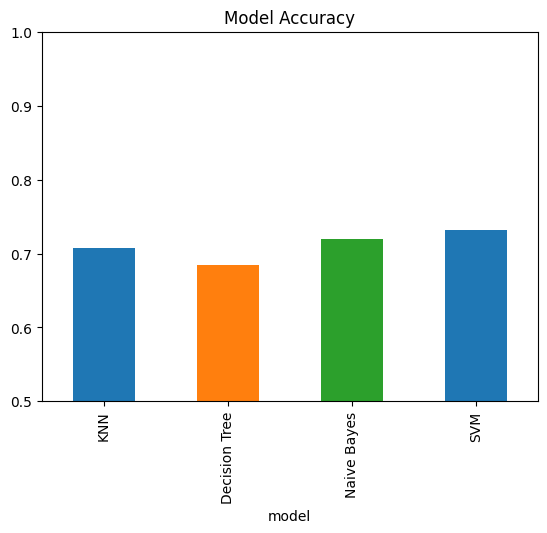

In [103]:
results.plot(kind='bar',x='model',y='accuracy',title='Model Accuracy',legend=False,
        color=['#1F77B4', '#FF7F0E', '#2CA02C'])
plt.ylim(0.5,1);

In [104]:
### SECOND TRAINING APPLYING SOME TRANSFORMATIONS ON THE NUMERICAL DATA AND DROPPING THOSE WITH SMALLER CORRELATIONS

In [105]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,Deck,Port,TotalSpend
0,2,0,1,39.0,0,False,0,0,0.0
1,1,0,1,24.0,0,True,1,1,736.0
2,2,0,1,58.0,1,False,2,1,10383.0
3,2,0,1,33.0,0,False,2,1,5176.0
4,1,0,1,16.0,0,True,1,1,1091.0


In [106]:
df = df.drop(['Deck', 'Port'], axis=1)

In [107]:
# For Standardization (Z-score normalization)
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df['TotalSpend'] = scaler.fit_transform(df[['TotalSpend']])

In [108]:
df.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,TotalSpend
0,2,0,1,0.709437,0,False,-0.525934
1,1,0,1,-0.336717,0,True,-0.263054
2,2,0,1,2.034566,1,False,3.182605
3,2,0,1,0.290975,0,False,1.322799
4,1,0,1,-0.894666,0,True,-0.136257


In [109]:
correlation_matrix = df.corr()
correlation_matrix

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,TotalSpend
HomePlanet,1.000000,0.083586,-0.034737,0.133888,0.123512,0.115461,0.150317
CryoSleep,0.083586,1.000000,0.096287,-0.070736,-0.078281,0.460132,-0.376500
Destination,-0.034737,0.096287,1.000000,0.006619,0.044707,0.108152,0.099205
Age,0.133888,-0.070736,0.006619,1.000000,0.091574,-0.074249,0.184509
VIP,0.123512,-0.078281,0.044707,0.091574,1.000000,-0.037261,0.163187
Transported,0.115461,0.460132,0.108152,-0.074249,-0.037261,1.000000,-0.199445
TotalSpend,0.150317,-0.376500,0.099205,0.184509,0.163187,-0.199445,1.000000


In [110]:
### SAVE TRAIN 2

filename =  pathlib.Path(filepath).stem + "_cleaned_2.csv"
file_dest_path = pathlib.Path("./") / filename
df.to_csv(file_dest_path, index=False)

In [111]:
df_train_2 = pd.read_csv("./train_cleaned_2.csv")
# 1. Train Test Split
X = df_train_2.drop("Transported", axis=1).values
y = df_train_2["Transported"].values

In [112]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape,y_train.shape, X_test.shape, y_test.shape

((6954, 6), (6954,), (1739, 6), (1739,))

In [113]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_score = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", knn_score)

KNN Accuracy: 0.6998274870615296


In [114]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree_score = accuracy_score(y_test, dtree_pred)
print("Decision Tree Accuracy:", dtree_score)

Decision Tree Accuracy: 0.6538240368027602


In [115]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_score = accuracy_score(y_test, nb_pred)
print("Naive Bayes Accuracy:", nb_score)

Naive Bayes Accuracy: 0.718803910293272


In [116]:
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
svc_score = accuracy_score(y_test, svc_pred)
print("SVM Accuracy:", svc_score)

SVM Accuracy: 0.7412305922944221


In [117]:
results = pd.DataFrame(dict(model=['KNN',
                              'Decision Tree',
                              'Naive Bayes',
                              'SVM'],accuracy=[knn_score, dtree_score,
                                               nb_score, svc_score]))

results

,model,accuracy
0,KNN,0.699827
1,Decision Tree,0.653824
2,Naive Bayes,0.718804
3,SVM,0.741231


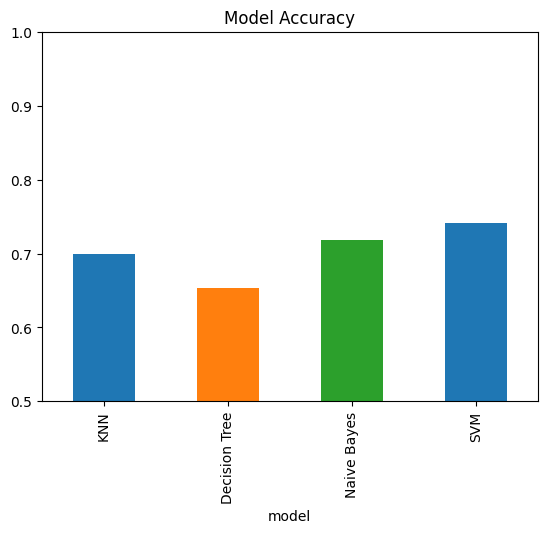

In [118]:
results.plot(kind='bar',x='model',y='accuracy',title='Model Accuracy',legend=False,
        color=['#1F77B4', '#FF7F0E', '#2CA02C'])
plt.ylim(0.5,1);

In [119]:
### try some hyper parameter optimization


In [120]:


# KNN with Hyperparameter Optimization
knn = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5, scoring='accuracy')
knn_grid_search.fit(X_train, y_train)
knn_best_model = knn_grid_search.best_estimator_
knn_pred = knn_best_model.predict(X_test)
knn_score = accuracy_score(y_test, knn_pred)
print("KNN Best Parameters:", knn_grid_search.best_params_)
print("KNN Accuracy:", knn_score)

# Decision Tree with Hyperparameter Optimization
dtree = DecisionTreeClassifier()
dtree_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
dtree_grid_search = GridSearchCV(dtree, dtree_param_grid, cv=5, scoring='accuracy')
dtree_grid_search.fit(X_train, y_train)
dtree_best_model = dtree_grid_search.best_estimator_
dtree_pred = dtree_best_model.predict(X_test)
dtree_score = accuracy_score(y_test, dtree_pred)
print("Decision Tree Best Parameters:", dtree_grid_search.best_params_)
print("Decision Tree Accuracy:", dtree_score)

# Naive Bayes (usually does not require much hyperparameter tuning)
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_score = accuracy_score(y_test, nb_pred)
print("Naive Bayes Accuracy:", nb_score)

# SVM with Hyperparameter Optimization
svc = SVC()
svc_param_grid = {
    'C': [0.1, 1, 10], # removed 10
    'gamma': ['scale', 'auto'], # removed auto
    'kernel': ['linear', 'rbf', 'poly'] # removed poly
}
svc_grid_search = GridSearchCV(svc, svc_param_grid, cv=5, scoring='accuracy')
svc_grid_search.fit(X_train, y_train)
svc_best_model = svc_grid_search.best_estimator_
svc_pred = svc_best_model.predict(X_test)
svc_score = accuracy_score(y_test, svc_pred)
print("SVM Best Parameters:", svc_grid_search.best_params_)
print("SVM Accuracy:", svc_score)


KNN Best Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
KNN Accuracy: 0.7165037377803335
Decision Tree Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5}
Decision Tree Accuracy: 0.721679125934445
Naive Bayes Accuracy: 0.718803910293272
SVM Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
SVM Accuracy: 0.7464059804485337
